<a href="https://colab.research.google.com/github/nutyfreshz/MADT8101_Customer_Analytics/blob/main/EP_3_4_Building_Customer_Single_View_%26_Basics_customer_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**What is Customer Single View**

##**Customer Single View**

**Definition:**

Customer Single View is a consolidated and unified representation of an individual customer's data from various sources within an organization, providing a comprehensive understanding of customer interactions.

**Example of multiple source:**
* Customer Relationship Management (CRM) systems: Information about customer interactions, sales history, support tickets, etc.

* Sales and transactional systems: Details of purchases, order history, invoices, and payments.

* Marketing systems: Data on marketing campaigns, responses, preferences, and engagement.

* Service and support systems: Records of customer inquiries, complaints, resolutions, and feedback.

* Web analytics and digital channels: Data from website interactions, mobile apps, social media, and other digital touchpoints.

**Benefits:**

* Improved Customer Understanding: A unified view provides a holistic understanding of the customer's preferences, behaviors, and needs, leading to better customer segmentation and personalized interactions.

* Enhanced Customer Service: Having access to a customer's history across various touchpoints enables customer service representatives to offer more relevant and efficient support.

* Targeted Marketing: Marketers can use the comprehensive view to create targeted and personalized marketing campaigns based on individual customer preferences and behavior.

* Cross-Selling and Upselling Opportunities: With a deeper understanding of customer needs, businesses can identify opportunities for cross-selling and upselling products or services.

* Better Decision Making: Data-driven insights from a Customer Single View can guide strategic decisions, product development, and overall business strategies.

* Fraud Detection and Risk Management: A comprehensive view of customer interactions can help detect fraudulent activities and manage potential risks associated with customer accounts.

**Example of Key Elements of Customer Single View: In Retail**

**By row customer_id must unique and features columns must link with business objective**

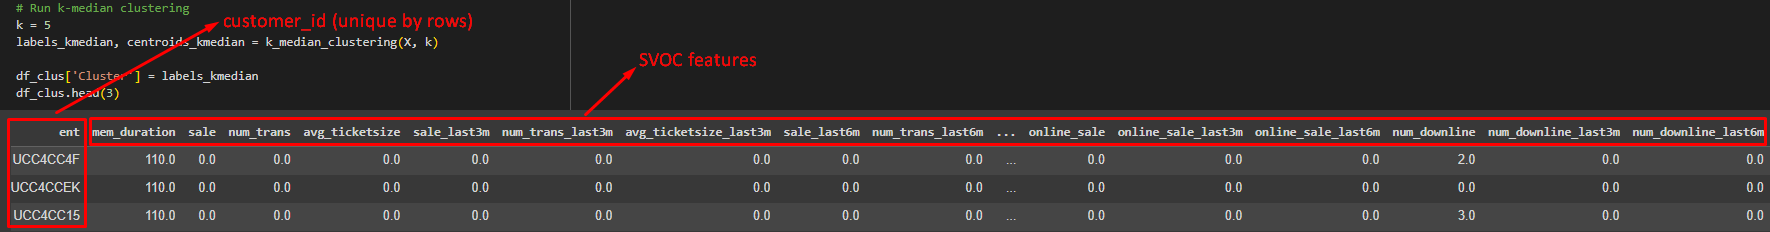

In this case: Business want to know behavior trend by using Time period variable(last 3m,last 6m) for caculation.

#**Data Processing for SVOC**

## **Using Python**

**pandas:**
"df.groupby()"

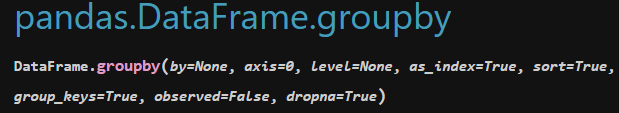

In [ ]:
#Example of python code for create simple SVOC

from statistics import mode

def get_mode(x):
    try:
        return mode(x)
    except:
        return None

df_mas['visit'] = df_mas['date'].dt.strftime('%Y-%m-%d') + '_' + df_mas['customer_id'].astype(str)

agg_funcs = {
              'dollar_sales': ['sum','mean']
              , 'price_per_u': 'mean'
              , 'customer_id': lambda x: len(x.unique())
              , 'transaction_id': lambda x: len(x.unique())
              , 'visit': lambda x: len(x.unique())
              , 'brand': lambda x: len(x.unique())
              , 'commodity': lambda x: get_mode(x)
              , 'product_description': lambda x: get_mode(x)
              , 'date': lambda x: len(x.unique())
}

df_group = df_mas.groupby('store').agg(agg_funcs)

df_group.columns = ['_'.join(col).strip() for col in df_group.columns.values]
df_group.columns = ['total_amount_dollar_sales', 'average_dollar_sales', 'average_price_per_u', 'number_customer', 'number_tnx', 'number_visit', 'number_brand_sold', 'most_commodity_sold','most_product_sold','num_days_open']

df_group.reset_index(inplace = True)

df_group['atv'] = df_group['total_amount_dollar_sales']/ df_group['number_tnx']
df_group['spend_per_customer'] = df_group['total_amount_dollar_sales']/ df_group['number_customer']
df_group['spend_per_visit'] = df_group['total_amount_dollar_sales']/df_group['number_visit']
df_group['avg_tnx_per_day'] = df_group['number_tnx'] / df_group['num_days_open']
df_group['avg_sales_per_day'] = df_group['total_amount_dollar_sales'] / df_group['num_days_open']
df_group['avg_visits_per_customer'] = df_group['number_visit'] / df_group['number_customer']
df_group['avg_tnx_per_customer'] = df_group['number_tnx'] / df_group['number_customer']
df_group['avg_spend_per_customer_per_visit'] = df_group['spend_per_visit'] / df_group['avg_visits_per_customer']


**Example of output SVOC dataframe that we create**

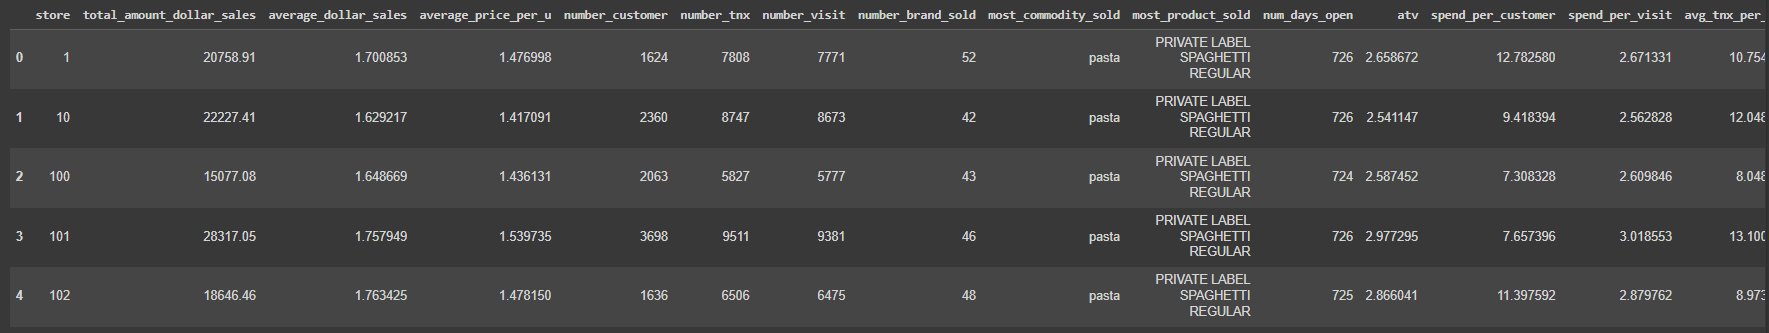

In this case: We create "store" svoc to prepare feeding prep data into clustering (ML)

## **Using SQL**

**Example of create SVOC by sql by pivot with "CASE WHEN" technique**

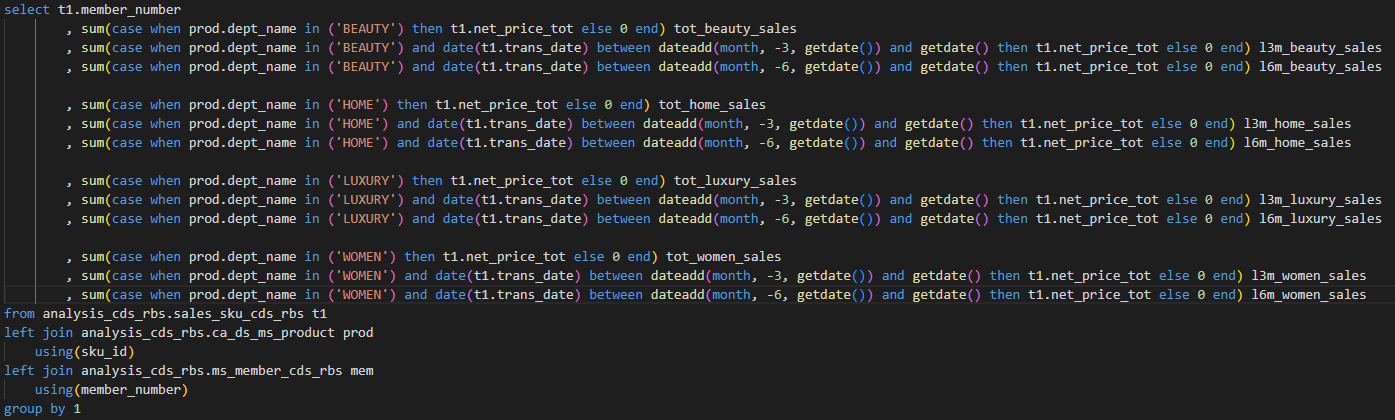

This query will generate unique customer_id (member_number) and pivot sales with last 3,6 months sales each selected category(dept_name)

**Alternative way to create SVOC with pivot method is "PIVOT" function**

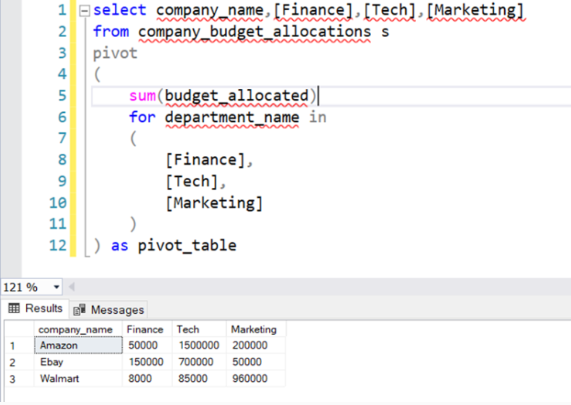

# **WORKSHOP**

## **Supermarket customer analysis**

**Data planning**

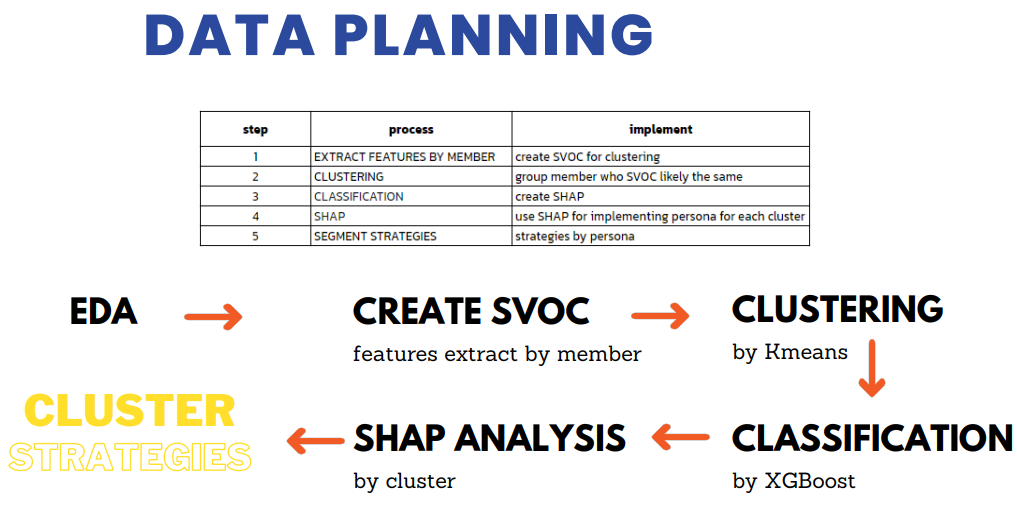

On EDA section, We need to analyse Overall customer (member vs non-member) to find insight about non-member before we deep drive on member status and do the clustering at the end of data planning.

**Customer overview analysis (Member vs Non-Member)**

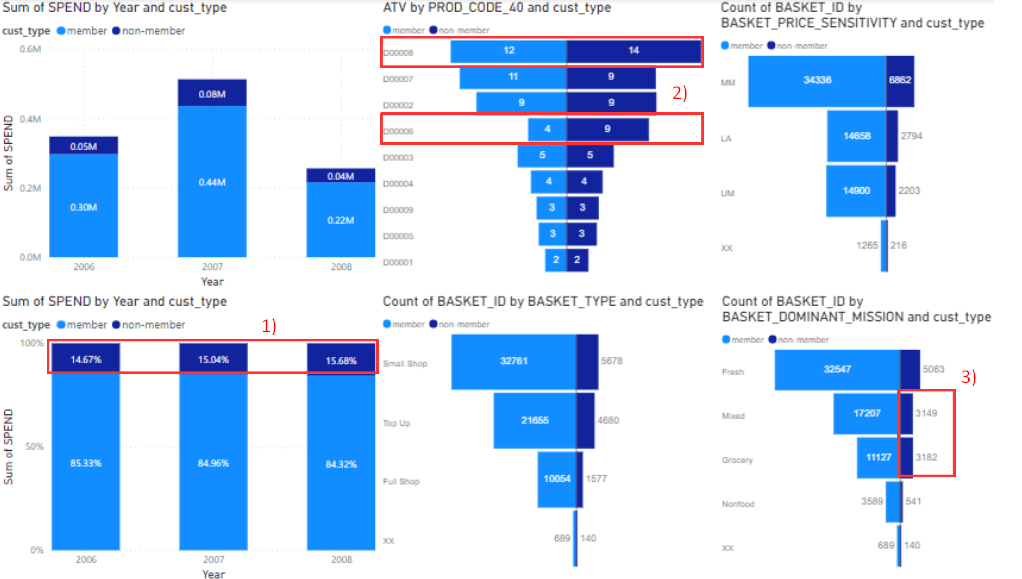

**Sales contribution pareto chart**

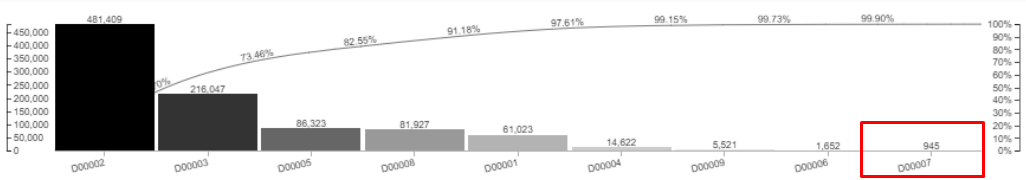

From EDA, member vs non member, We can find insight following these:

* 1) Sales contribution between non-member and member, We can see non-member sales contribution increase over the year from 14.67% to 15.68% which mean we capture member behavior less than before and this can highly impact on personalized communication because we requuire member_id to communicate them.

* 2) Due to non-member did not have member_id so we will calculate ATV from sales and receipt_no to see quality of customer. non-member not alway less spending power as you can see category D000008 and D000006 which non-member have ATV more than member.

**Key takeouts:**

* Drive non-member to be member to expand member base for doing personalized campaign more effecieny

* For non-member, we will focus on Acquisition strategy using Category D000008 and D000006 to drive more quality of customer and use Basket dominant such as Fresh, Mixed, Grocery Artwork & Special mechanics to drive non-member to registered.

* For member, we will focus on Retention strategy using Category D000008, and D000002 and use Basket dominant such as Fresh, Mixed Artwork & Special mechanics to maintain member to shop.

Note: We filter out D000007 because sales contribution on this category has the lowest sales which mean this category did not have high impact on sales.

**%Sales contribution by  customer life stage**

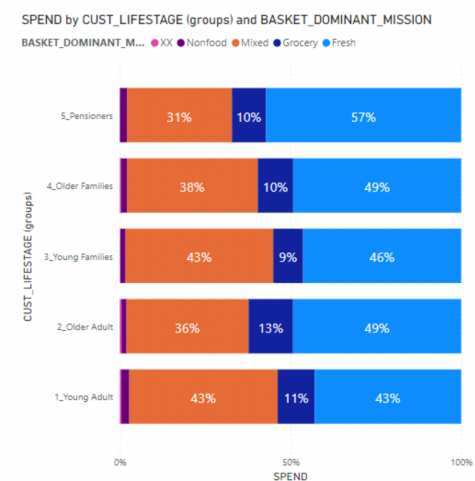

**Key takeouts:**

* Pensioners tend to purchase Fresh type items more spending than other customer life stages, likely because they have more time available for cooking and meal preparation. This behavior is influenced by their lifestyle and daily routines during retirement.

* Young Families and Young Adults have a higher tendency to purchase Mixed* type items, spending more than other customer life stages. This behavior is likely influenced by their busy lifestyle during hard working times, which leaves them with less time available for cooking and meal preparation. As a result, they opt for convenient and ready-to-cook Mixed* type items to meet their dietary needs.

**SVOC features for clustering**

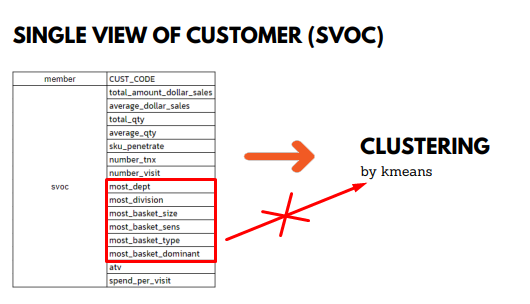

**What we can improve ?**

* To utilize K-means, it is essential to transform SVOC features into numeric data type and exclude categorical data type like department, division, and others from the dataset.

* To retain categorical features while clustering with numeric data type, the K-Prototype algorithm can be utilized. Unlike K-Means, K-Prototype can handle mixed data types, combining K-Means for numeric data and K-Modes for categorical data

* Outlier clamping improves K-means clustering efficiency and reduces sensitivity to outliers, resulting in more accurate and reliable clusters, especially for datasets with potential outlier distortions.

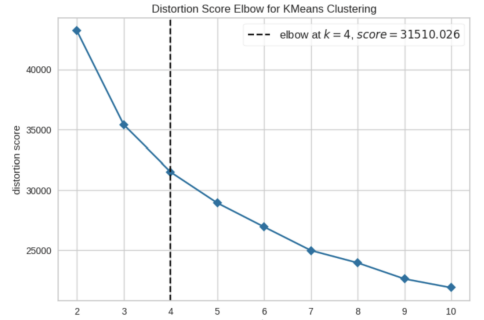

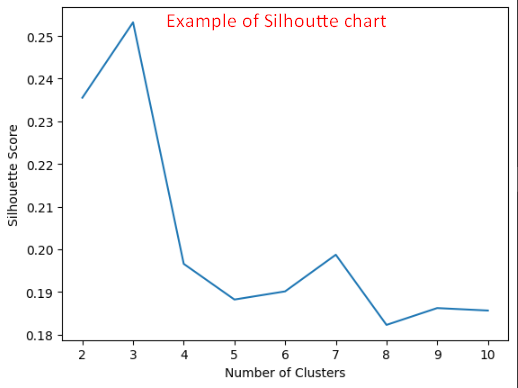

After preparing the data for clustering, we feed it into an unsupervised model, such as K-Means. To determine the optimal number of clusters more effectively, we can use the Silhouette method. The Silhouette method measures how well each data point fits into its assigned cluster, helping us identify the number of clusters that yields the most distinct and well-separated groups.

**Note: Silhoutte did not run on this workshop.**

**Further analysis**

* After obtaining the clusters through K-means, the next step is to perform a groupby operation based on the clusters. This allows us to analyze the sales impact of each cluster and identify which clusters have a significant contribution to the business. By examining the size and price of purchases within each cluster.

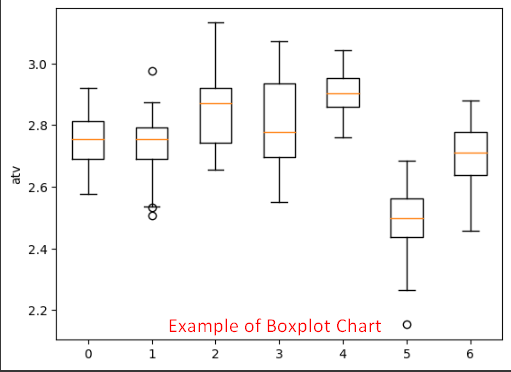

* Using boxplot chart to visualize outstanding features on each group.
 * For example, in Cluster 5, the chart reveals the lowest Average Transaction Value (ATV) and a high percentage of SKU penetration. By analyzing the purchasing behavior of customers in this cluster and identifying their preferred categories, businesses can provide artwork with various SKU options to cater to their specific needs.